In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Netflix=pd.read_csv('HistoricalPrices (1).csv')
Netflix.shape

(2600, 6)

In [3]:
Netflix.head()

,Date,Open,High,Low,Close,Volume
0,05/01/20,415.10,427.97,411.7300,415.27,8299858.0
1,04/30/20,410.31,424.44,408.0000,419.85,7953975.0
2,04/29/20,399.53,415.86,393.6000,411.89,9693137.0
3,04/28/20,419.99,421.00,402.9101,403.83,10101230.0
4,04/27/20,425.00,429.00,420.8400,421.38,6277480.0


In [4]:
Netflix.describe()

,Open,High,Low,Close,Volume
count,2600.000000,2600.000000,2600.000000,2600.000000,2.600000e+03
mean,123.699440,125.658750,121.676260,123.747980,2.135381e+07
std,122.073901,124.015062,120.042878,122.102879,2.176580e+07
min,6.960000,7.178600,6.931400,7.018600,1.616260e+06
25%,27.053700,27.492550,26.606800,27.026425,8.374366e+06
50%,67.400750,68.045700,66.727900,67.467150,1.515516e+07
75%,185.867500,188.110000,183.205000,185.552500,2.665550e+07
max,444.770000,449.520000,431.610000,439.170000,3.155412e+08


In [5]:
Netflix.isnull().sum()

Date       0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
dtype: int64

In [6]:
Netflix.dtypes

Date        object
 Open      float64
 High      float64
 Low       float64
 Close     float64
 Volume    float64
dtype: object

In [7]:
Netflix['Date_f']=pd.to_datetime(Netflix['Date'])
Netflix.dtypes

Date               object
 Open             float64
 High             float64
 Low              float64
 Close            float64
 Volume           float64
Date_f     datetime64[ns]
dtype: object

In [8]:
Netflix.sort_values(by='Date_f',ascending=False)

,Date,Open,High,Low,Close,Volume,Date_f
0,05/01/20,415.1000,427.9700,411.7300,415.2700,8.299858e+06,2020-05-01
1,04/30/20,410.3100,424.4400,408.0000,419.8500,7.953975e+06,2020-04-30
2,04/29/20,399.5300,415.8600,393.6000,411.8900,9.693137e+06,2020-04-29
3,04/28/20,419.9900,421.0000,402.9101,403.8300,1.010123e+07,2020-04-28
4,04/27/20,425.0000,429.0000,420.8400,421.3800,6.277480e+06,2020-04-27
...,...,...,...,...,...,...,...
2595,01/08/10,7.4986,7.7429,7.4657,7.6143,8.180697e+06,2010-01-08
2596,01/07/10,7.7314,7.7571,7.4629,7.4857,9.955204e+06,2010-01-07
2597,01/06/10,7.3614,7.6729,7.1971,7.6171,2.329456e+07,2010-01-06
2598,01/05/10,7.6529,7.6571,7.2586,7.3586,2.375344e+07,2010-01-05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe5cfc39e8>,
      dtype=object)

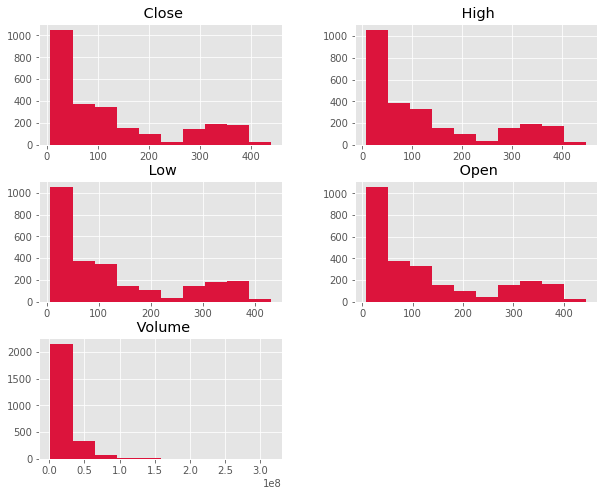

In [9]:
Netflix.hist(figsize=(10,8), color = "crimson")

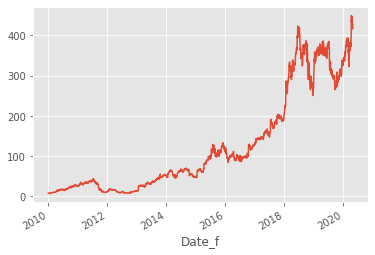

In [10]:
Netflix.set_index(['Date_f'])[' High'].plot(kind = 'line')

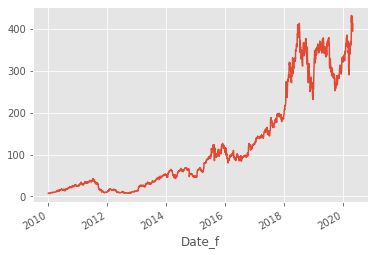

In [11]:
Netflix.set_index(['Date_f'])[' Low'].plot(kind = 'line')

[]

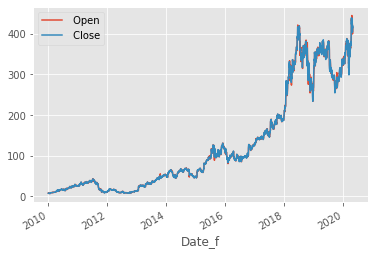

In [12]:
Netflix.plot(x='Date_f',y=[' Open',' Close']).plot(kind = 'line')

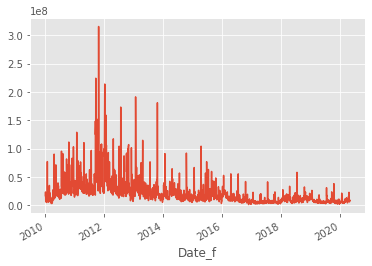

In [13]:
Netflix.set_index(['Date_f'])[' Volume'].plot(kind = 'line')

In [14]:
Netflix_df_num_corr = Netflix.corr()[' Close'][:-1] 
list = Netflix_df_num_corr[abs(Netflix_df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Close:\n{}".format(len(list), list))

There is 4 strongly correlated values with Close:
 Close    1.000000
 High     0.999782
 Low      0.999777
 Open     0.999528
Name:  Close, dtype: float64


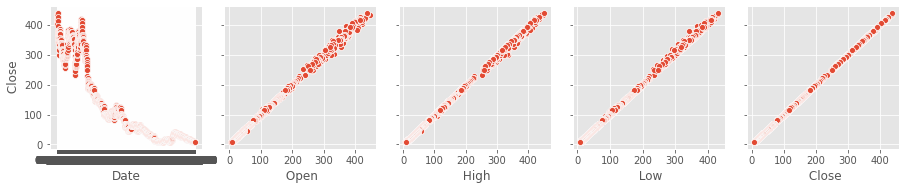

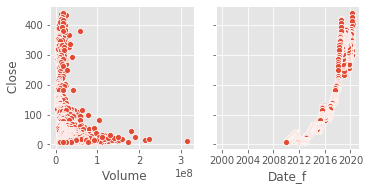

In [15]:
for i in range(0, len(Netflix.columns), 5):
    sns.pairplot(data=Netflix,
                x_vars=Netflix.columns[i:i+5],
                y_vars=[' Close'])

In [16]:
Netflix_df = Netflix.dropna()
Netflix_df = Netflix_df[['Date_f', ' Open', ' High', ' Low', ' Close']]
Netflix_df.set_index(['Date_f'], inplace=True)
Netflix_df.head()

,Open,High,Low,Close
Date_f,,,,
2020-05-01,415.10,427.97,411.7300,415.27
2020-04-30,410.31,424.44,408.0000,419.85
2020-04-29,399.53,415.86,393.6000,411.89
2020-04-28,419.99,421.00,402.9101,403.83
2020-04-27,425.00,429.00,420.8400,421.38


In [17]:
Netflix_df['Open-Close'] = Netflix_df[' Open'] - Netflix_df[' Close']
Netflix_df['High-Low'] = Netflix_df[' High'] - Netflix_df[' Low']
Netflix_df= Netflix_df.dropna()
x= Netflix_df[['Open-Close', 'High-Low']]
x.head()

,Open-Close,High-Low
Date_f,,
2020-05-01,-0.17,16.2400
2020-04-30,-9.54,16.4400
2020-04-29,-12.36,22.2600
2020-04-28,16.16,18.0899
2020-04-27,3.62,8.1600


In [18]:
x.tail()

,Open-Close,High-Low
Date_f,,
2010-01-08,-0.1157,0.2772
2010-01-07,0.2457,0.2942
2010-01-06,-0.2557,0.4758
2010-01-05,0.2943,0.3985
2010-01-04,0.2914,0.3957


In [19]:
y= np.where(Netflix_df[' Close'].shift(-1)> Netflix_df[' Close'], 1, -1)
x

,Open-Close,High-Low
Date_f,,
2020-05-01,-0.1700,16.2400
2020-04-30,-9.5400,16.4400
2020-04-29,-12.3600,22.2600
2020-04-28,16.1600,18.0899
2020-04-27,3.6200,8.1600
...,...,...
2010-01-08,-0.1157,0.2772
2010-01-07,0.2457,0.2942
2010-01-06,-0.2557,0.4758


In [20]:
split_percentage= 0.7
split= int(split_percentage*len(Netflix_df))

x_train= x[-split:]
y_train= y[-split:]

x_test= x[:-split]
y_test= y[:-split]
x_test

,Open-Close,High-Low
Date_f,,
2020-05-01,-0.17,16.2400
2020-04-30,-9.54,16.4400
2020-04-29,-12.36,22.2600
2020-04-28,16.16,18.0899
2020-04-27,3.62,8.1600
...,...,...
2017-03-31,0.19,0.8950
2017-03-30,-1.25,1.7600
2017-03-29,-0.97,2.2711


In [0]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [22]:
print(train_scores)
print(test_scores)

[1.0, 0.9021440351841671, 0.8982957669048928, 0.880153930731171, 0.8851017042330951, 0.8763056624518967, 0.8763056624518967, 0.8746564046179219, 0.8752061572292469, 0.8746564046179219, 0.880153930731171, 0.8735568993952721, 0.8768554150632215, 0.8735568993952721]
[0.8271446862996159, 0.8476312419974392, 0.8553137003841229, 0.8629961587708067, 0.8693982074263764, 0.8719590268886044, 0.8745198463508322, 0.8719590268886044, 0.8655569782330346, 0.8668373879641486, 0.8693982074263764, 0.8681177976952625, 0.8668373879641486, 0.8681177976952625]


In [24]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,70)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(x_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8680802622791572
Best Parameters: {'n_neighbors': 47}


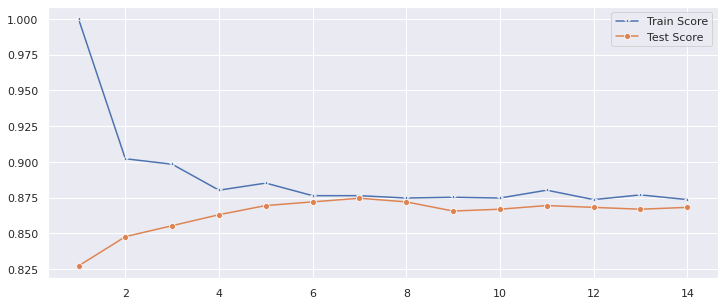

In [25]:
sns.set()
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [26]:
knn = KNeighborsClassifier(7)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8745198463508322

In [27]:
Netflix_df['Predicted']= knn.predict(x)
Netflix_df['Netflix_Returns']= np.log(Netflix_df[' Close'] / Netflix_df[' Close'].shift(1))
Cummulative_Netflix_Returns= Netflix_df[:-split]['Netflix_Returns'].cumsum()*100

Netflix_df['Strategy_Returns']= Netflix_df['Netflix_Returns'] * Netflix_df['Predicted'].shift(1)
Cummulative_Strategy_Returns= Netflix_df[:-split]['Strategy_Returns'].cumsum()*100

Cummulative_Strategy_Returns

Date_f
2020-05-01            NaN
2020-04-30       1.096859
2020-04-29       3.010977
2020-04-28       4.987210
2020-04-27       9.241314
                 ...     
2017-03-31    1222.648950
2017-03-30    1222.817943
2017-03-29    1223.897640
2017-03-28    1224.789156
2017-03-27    1225.556715
Name: Strategy_Returns, Length: 781, dtype: float64

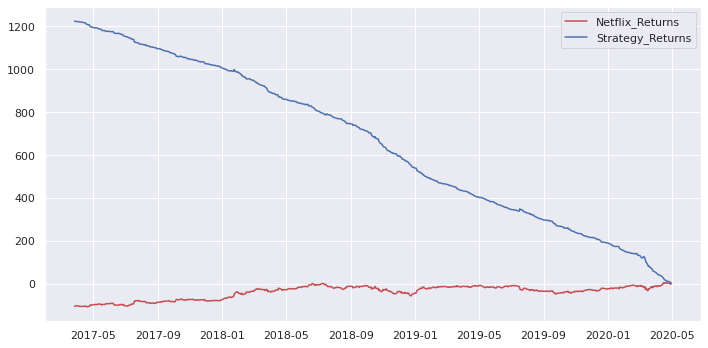

In [28]:
plt.figure(figsize=(10,5))
plt.plot(Cummulative_Netflix_Returns, color='r', label= 'Netflix_Returns')
plt.plot(Cummulative_Strategy_Returns, color='b', label='Strategy_Returns')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
y_test_pad = np.pad(y_test, (0, len(knn.predict(x))-len(y_test)), 'constant')
len(y_test_pad)

2600

In [30]:
rms=np.sqrt(np.mean(np.power((y_test_pad-np.array(knn.predict(x))),2)))
rms

0.9221630091174854

In [31]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred = knn.predict(x_test)
y_pred
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
True,,,
-1,351,51,402
1,47,332,379
All,398,383,781


Text(0.5, 12.5, 'Predicted ')

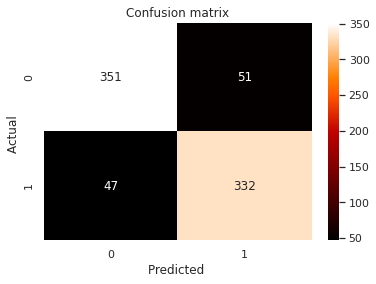

In [32]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="gist_heat" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual ')
plt.xlabel('Predicted ')